In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
from numpy import array
from numpy import hstack
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import mean_squared_error
from math import sqrt
#tf.random.set_seed(7)
#tf.random.set_seed(77)

In [2]:
nc_f    = './ConThkIstAlb.APP-x.1400.BeringStrait.nc'
nc_fid  = Dataset(nc_f, 'r')
time    = nc_fid.variables['record'][:]

In [3]:
sic    = nc_fid.variables['icecon'][:,0,0]
thk    = nc_fid.variables['icethk'][:,0,0]
tem    = nc_fid.variables['srftem'][:,0,0]
alb    = nc_fid.variables['srfalb'][:,0,0]

In [4]:
nmonth  = len(time)

thk_train       =  thk[0:nmonth-13]
tem_train       =  tem[0:nmonth-13]
alb_train       =  alb[0:nmonth-13]
time_train      = time[0:nmonth-13]

sic_train       =  sic[1:nmonth-12]
time_sic        = time[1:nmonth-12]

sic_train1 = sic_train.reshape((len(sic_train), 1))
thk_train1 = thk_train.reshape((len(thk_train), 1))
tem_train1 = tem_train.reshape((len(tem_train), 1))
alb_train1 = alb_train.reshape((len(alb_train), 1))

#dataset_train = hstack((tem_train1, thk_train1, sic_train1))
dataset_train = hstack((sic_train1, sic_train1))

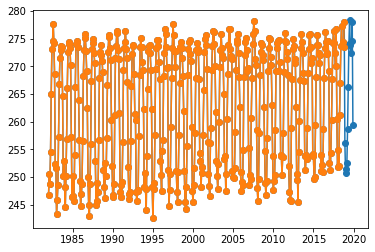

In [5]:
plt.plot(time,tem,'-o')
plt.plot(time_train,tem_train,'-o')

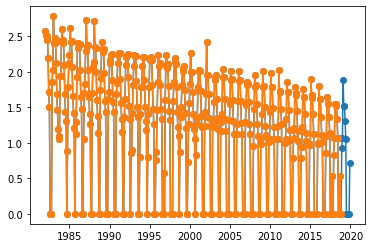

In [6]:
plt.plot(time,thk,'-o')
plt.plot(time_train,thk_train,'-o')

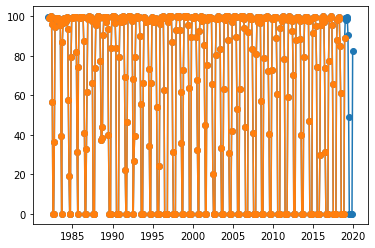

In [7]:
plt.plot(time,sic,'-o')
plt.plot(time_sic,sic_train,'-o')

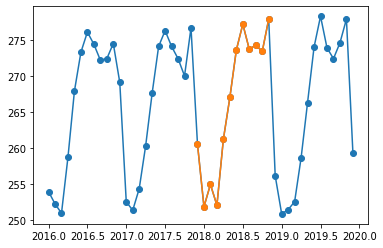

In [8]:
plt.plot(time[nmonth-48:],tem[nmonth-48:],'-o')
plt.plot(time_train[nmonth-24-1:nmonth-12-1],tem_train[nmonth-24-1:nmonth-12-1],'-o')

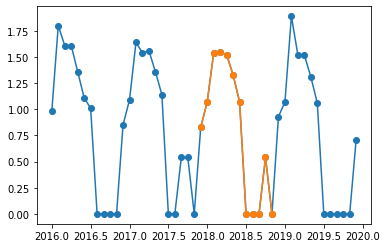

In [9]:
plt.plot(time[nmonth-48:],thk[nmonth-48:],'-o')
plt.plot(time_train[nmonth-24-1:nmonth-12-1],thk_train[nmonth-24-1:nmonth-12-1],'-o')

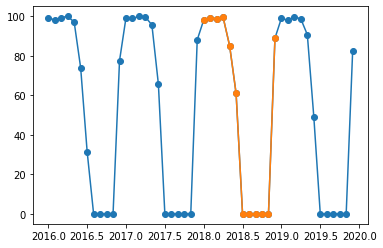

In [10]:
plt.plot(time[nmonth-48:],sic[nmonth-48:],'-o')
plt.plot(time_sic[nmonth-24-1:nmonth-12-1],sic_train[nmonth-24-1:nmonth-12-1],'-o')

In [11]:
# split a multivariate sequence into samples
def split_sequences(sequences, n_steps):
	X, y = list(), list()
	for i in range(len(sequences)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the dataset
		if end_ix > len(sequences):
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [12]:
n_steps = 12
X_SIC, Y_SIC = split_sequences(dataset_train, n_steps)
print(X_SIC.shape)
n_features = X_SIC.shape[2]

(432, 12, 1)


In [13]:
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
history = model.fit(X_SIC, Y_SIC, epochs=200, verbose=0)

In [14]:
sic_new = np.zeros(n_steps)
sic_target = sic[nmonth-n_steps:]
print(sic_target.shape)

(12,)


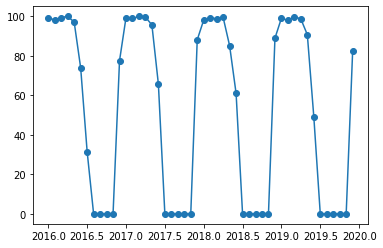

In [15]:
plt.plot(time[nmonth-48:],sic[nmonth-48:],'-o')

sic            at  2019.0 is  99.0
sic prediction at  2019.0 is  87.98686218261719

sic            at  2019.0833 is  97.9
sic prediction at  2019.0833 is  97.4130630493164

sic            at  2019.1666 is  99.8
sic prediction at  2019.1666 is  97.05072784423828

sic            at  2019.25 is  98.6
sic prediction at  2019.25 is  99.25296020507812

sic            at  2019.3333 is  90.7
sic prediction at  2019.3333 is  98.1899185180664

sic            at  2019.4166 is  49.2
sic prediction at  2019.4166 is  90.66911315917969

sic            at  2019.5 is  0.0
sic prediction at  2019.5 is  50.939598083496094

sic            at  2019.5833 is  0.0
sic prediction at  2019.5833 is  0.9881733059883118

sic            at  2019.6666 is  0.0
sic prediction at  2019.6666 is  -0.24508489668369293

sic            at  2019.75 is  0.0
sic prediction at  2019.75 is  0.7809673547744751

sic            at  2019.8333 is  0.0
sic prediction at  2019.8333 is  0.4158428907394409

sic            at  2019.9166 i

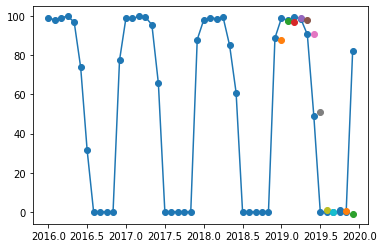

In [16]:
plt.plot(time[nmonth-48:],sic[nmonth-48:],'-o')

for i in range(n_steps):
        tem_input = tem[nmonth-24+i:nmonth-12+i]
        thk_input = thk[nmonth-24+i:nmonth-12+i]
        sic_input = sic[nmonth-24+i:nmonth-12+i]
        tem_input1 = tem_input.reshape((len(tem_input), 1))
        thk_input1 = thk_input.reshape((len(thk_input), 1))
        sic_input1 = sic_input.reshape((len(sic_input), 1))
        
        #dataset_input = hstack((tem_input1, thk_input1))
        #dataset_input = hstack((thk_input1))
        dataset_input = hstack((sic_input1))
        
        dataset_input1 = dataset_input.reshape((1, n_steps, n_features))
        #
        #print('input: ', x_input)
        #input('press return to continue')
        sic_new[i] = model.predict(dataset_input1, verbose=0)
        print('sic            at ', time[nmonth-12+i],'is ', sic[nmonth-12+i])
        print('sic prediction at ', time[nmonth-12+i],'is ', sic_new[i])
        print('')
        plt.plot(time[nmonth-12+i],sic_new[i],'-o')
        #input('press return to continue')

In [17]:
rmse = sqrt(mean_squared_error(sic_target, sic_new))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 30.910
